 ## Solid movement analysis
In this notebook, we use cytosim analysis to analyze a simulation where two asters interacts.
Asters have a solid core so we need to analyze the movement of solids over time.


### Reading config and reports
Now we can read the config and report files and build a representation of the simulation.
Core is an object, of type solid, and build is its building method.

In [1]:
import pkg_resources as pk
solid_file=pk.resource_filename( "cytolysis" , 'example_data/solids.txt')
config_file=pk.resource_filename( "cytolysis" , 'example_data/example.cym')

### Creating a representation of the simulation

In [2]:
from cytolysis import cytosim_analysis as ana
# Reading from report and config files
solids =   {"position": solid_file}
# Creating simulation representation
simul = ana.Simulation(solid_report={"core": solids}, config=config_file)

### Analyzing the simulation 
No that we have a representation of the simulation, we can analyze it. Here we define a function to measure the distance between the two cores.

In [3]:
import numpy as np
def intercore_distance(frame):
    return np.linalg.norm(frame.objects["solid"]["core"][0].position
                          - frame.objects["solid"]["core"][1].position)

# Declaration of analysis functions
analyzer = {'distance': intercore_distance } 

# Performing analysis
simul.make_analysis(frame_analyzer=analyzer)

In [4]:
# The analysis is stored as pandas dataframes :
analysis=simul.frames_analysis
analysis[0:6]

id  distance
0  0.0  8.000000
1  1.0  6.725801
2  2.0  6.781353
3  3.0  6.634162
4  4.0  6.514972
5  5.0  6.343201

### Plotting analysis results
Here we use the module matplotlib (pip install matplotlib) to plot results, because it can use pandas column.

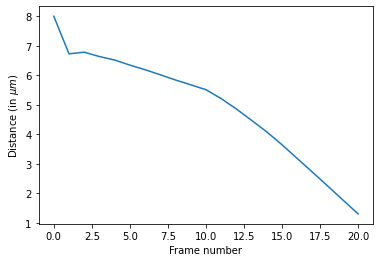

In [5]:
import matplotlib.pyplot as plt
plt.plot(analysis["id"],analysis["distance"])
plt.xlabel("Frame number")
plt.ylabel("Distance (in $\mu m$)")
plt.show()   